In [235]:
"""
Historical Backtesting
Calculate SPY price change (using the mean value of the price change) after certain trading days when the VIX price above a specific threshold
"""

'\nHistorical Backtesting\nCalculate SPY price change (using the mean value of the price change) after certain trading days when the VIX price above a specific threshold\n'

In [236]:
# import libraries
import pandas as pd
import Data.DataWrangle as DW
# import datetime
import hvplot.pandas
import seaborn as sns
import numpy as np



In [237]:
# import data with shared date
no_NAN = DW.shared_date_data()
no_NAN.head()

,close_SPY,close_TR,close_VIX
timestamp,,,
2015-12-02,208.54,2.7700,15.91
2015-12-03,205.58,4.3989,18.11
2015-12-04,209.66,4.3900,14.81
2015-12-07,208.27,2.5295,15.84
2015-12-08,206.99,2.5090,17.60


In [238]:
# select VIX and SPY data 
working_data = DW.slice_up(['close_SPY', 'close_VIX'])

# summary statistics for VIX
vix_tbl = working_data['close_VIX'].describe()
vix_tbl

count    1593.000000
mean       18.273503
std         8.207784
min         9.140000
25%        12.830000
50%        16.160000
75%        21.380000
max        82.690000
Name: close_VIX, dtype: float64

<AxesSubplot:xlabel='close_VIX', ylabel='Count'>

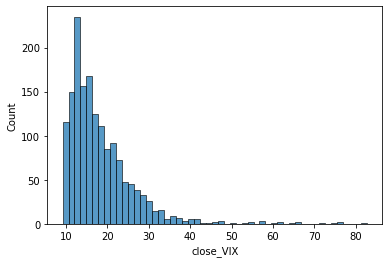

In [239]:
sns.histplot( working_data, x='close_VIX' )
                   

In [240]:
# plot VIX and SPY close price
working_data['close_VIX'].hvplot(label='VIX',xlabel='date', ylabel='price $',title ='VIX and SPY close price from 2015-12-02 to 2022-3-29') *  working_data['close_SPY'].hvplot(label='SPY')

:Overlay
   .Curve.VIX :Curve   [timestamp]   (close_VIX)
   .Curve.SPY :Curve   [timestamp]   (close_SPY)

In [241]:
 # reset 'timestamp' to column
 working_data.reset_index(inplace=True)

In [242]:
# define a function to calculate SPY price change based on VIX value
def backtesting_SPY_price_change_on_VIX(shreshold_1, shreshold_2, days ):
    # get the dataframe for close_VIX is greater a shreshold
    filtered_df =pd.DataFrame(working_data.loc[(working_data['close_VIX']>shreshold_1)& (working_data['close_VIX']<shreshold_2)]).reset_index()
    # rename the columns of the filtered dataframe
    filtered_df.columns =['filtered_index', 'filtered_timestamp', 'close_SPY','close_VIX']
    # get the dataframe for the shifted date 
    shifted_df= working_data.loc[filtered_df['filtered_index'][:-days]+days]
    shifted_df.reset_index(inplace=True)
    # rename the columns of the shifted dataframe
    shifted_df.columns = ['shifted_index','shifted_timestamp','shifted_close_SPY','shifted_close_VIX']
    # combined filtered and shifted dataframes
    combined_df = pd.concat([shifted_df, filtered_df], axis='columns', join='inner')
    price_change = combined_df['shifted_close_SPY']-combined_df['close_SPY']
    combined_df['price_change']= price_change
    return combined_df


    
 

##### SPY close price changes at 28 tradings days when VIX close price at different shresholds

In [243]:
price_change_df_1 = backtesting_SPY_price_change_on_VIX(round(vix_tbl[3],2),round(vix_tbl[4],2),28)
price_change_df_1.head()



,shifted_index,shifted_timestamp,shifted_close_SPY,shifted_close_VIX,filtered_index,filtered_timestamp,close_SPY,close_VIX,price_change
0,183,2016-08-23,218.93,12.38,155,2016-07-14,216.11,12.82,2.82
1,184,2016-08-24,217.88,13.45,156,2016-07-15,215.84,12.67,2.04
2,185,2016-08-25,217.66,13.63,157,2016-07-18,216.41,12.44,1.25
3,186,2016-08-26,217.28,13.65,158,2016-07-19,216.18,11.97,1.10
4,187,2016-08-29,218.34,12.94,159,2016-07-20,217.13,11.77,1.21


Text(0.5, 1.0, 'SPY price change (min<VIX<25%, 28 trading days)')

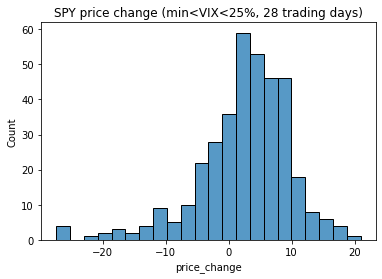

In [244]:
sns.histplot( price_change_df_1['price_change']).set_title('SPY price change (min<VIX<25%, 28 trading days)')

In [245]:
price_change_df_2 = backtesting_SPY_price_change_on_VIX(round(vix_tbl[4],2),round(vix_tbl[5],2),28)
price_change_df_2.head()

,shifted_index,shifted_timestamp,shifted_close_SPY,shifted_close_VIX,filtered_index,filtered_timestamp,close_SPY,close_VIX,price_change
0,28,2016-01-12,193.66,22.47,0,2015-12-01,210.68,14.67,-17.02
1,29,2016-01-13,188.87,25.22,1,2015-12-02,208.54,15.91,-19.67
2,31,2016-01-15,187.83,27.02,3,2015-12-04,209.66,14.81,-21.83
3,32,2016-01-19,188.06,26.05,4,2015-12-07,208.27,15.84,-20.21
4,44,2016-02-04,191.53,21.84,16,2015-12-23,206.05,15.57,-14.52


Text(0.5, 1.0, 'SPY price change (25%<VIX<50%, 28 trading days)')

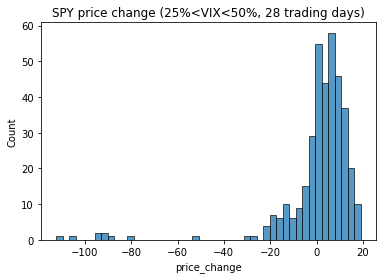

In [246]:
sns.histplot( price_change_df_2['price_change']).set_title('SPY price change (25%<VIX<50%, 28 trading days)')

In [247]:
price_change_df_3 = backtesting_SPY_price_change_on_VIX(round(vix_tbl[5],2),round(vix_tbl[6],2),28)
price_change_df_3.head()

,shifted_index,shifted_timestamp,shifted_close_SPY,shifted_close_VIX,filtered_index,filtered_timestamp,close_SPY,close_VIX,price_change
0,30,2016-01-14,191.89,23.95,2,2015-12-03,205.58,18.11,-13.69
1,33,2016-01-20,185.81,27.59,5,2015-12-08,206.99,17.60,-21.18
2,34,2016-01-21,186.70,26.69,6,2015-12-09,205.33,19.61,-18.63
3,35,2016-01-22,190.55,22.34,7,2015-12-10,205.86,19.34,-15.31
4,38,2016-01-27,188.14,23.11,10,2015-12-15,205.06,20.95,-16.92


Text(0.5, 1.0, 'SPY price change (50%<VIX<75%, 28 trading days)')

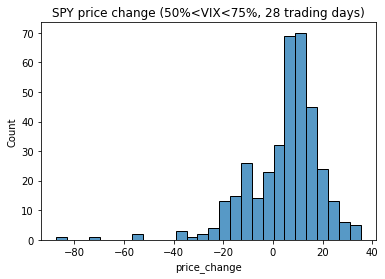

In [248]:
sns.histplot( price_change_df_3['price_change']).set_title('SPY price change (50%<VIX<75%, 28 trading days)')

In [249]:
price_change_df_4 = backtesting_SPY_price_change_on_VIX(round(vix_tbl[6],2),round(vix_tbl[7],2),28)
price_change_df_4.head()

,shifted_index,shifted_timestamp,shifted_close_SPY,shifted_close_VIX,filtered_index,filtered_timestamp,close_SPY,close_VIX,price_change
0,36,2016-01-25,187.63,24.15,8,2015-12-11,201.88,24.39,-14.25
1,37,2016-01-26,190.24,22.50,9,2015-12-14,203.00,22.73,-12.76
2,53,2016-02-18,192.05,21.64,25,2016-01-07,193.99,24.99,-1.94
3,54,2016-02-19,192.00,20.53,26,2016-01-08,191.95,27.01,0.05
4,55,2016-02-22,194.83,19.38,27,2016-01-11,192.11,24.30,2.72


Text(0.5, 1.0, 'SPY price change (75%<VIX<max, 28 trading days)')

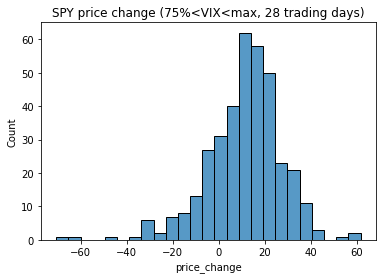

In [250]:
sns.histplot( price_change_df_4['price_change']).set_title('SPY price change (75%<VIX<max, 28 trading days)')

##### SPY close price changes at 100 tradings days when VIX close price at different shresholds

In [251]:
price_change_df_5 = backtesting_SPY_price_change_on_VIX(round(vix_tbl[3],2),round(vix_tbl[4],2),100)
price_change_df_5.head()

,shifted_index,shifted_timestamp,shifted_close_SPY,shifted_close_VIX,filtered_index,filtered_timestamp,close_SPY,close_VIX,price_change
0,255,2016-12-05,221.00,12.14,155,2016-07-14,216.11,12.82,4.89
1,256,2016-12-06,221.70,11.79,156,2016-07-15,215.84,12.67,5.86
2,257,2016-12-07,224.60,12.22,157,2016-07-18,216.41,12.44,8.19
3,258,2016-12-08,225.15,12.64,158,2016-07-19,216.18,11.97,8.97
4,259,2016-12-09,226.51,11.75,159,2016-07-20,217.13,11.77,9.38


Text(0.5, 1.0, 'SPY price change (min<VIX<25%, 100 trading days)')

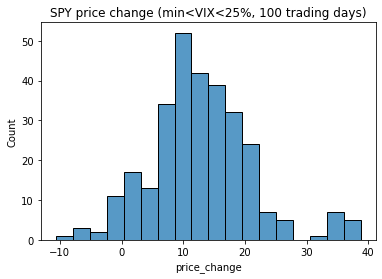

In [252]:
sns.histplot( price_change_df_5['price_change']).set_title('SPY price change (min<VIX<25%, 100 trading days)')

In [253]:
price_change_df_6 = backtesting_SPY_price_change_on_VIX(round(vix_tbl[4],2),round(vix_tbl[5],2),100)
price_change_df_6.head()

,shifted_index,shifted_timestamp,shifted_close_SPY,shifted_close_VIX,filtered_index,filtered_timestamp,close_SPY,close_VIX,price_change
0,100,2016-04-26,209.00,13.96,0,2015-12-01,210.68,14.67,-1.68
1,101,2016-04-27,209.38,13.77,1,2015-12-02,208.54,15.91,0.84
2,103,2016-04-29,206.30,15.70,3,2015-12-04,209.66,14.81,-3.36
3,104,2016-05-02,208.03,14.68,4,2015-12-07,208.27,15.84,-0.24
4,116,2016-05-18,204.91,15.95,16,2015-12-23,206.05,15.57,-1.14


Text(0.5, 1.0, 'SPY price change (25%<VIX<50%, 100 trading days)')

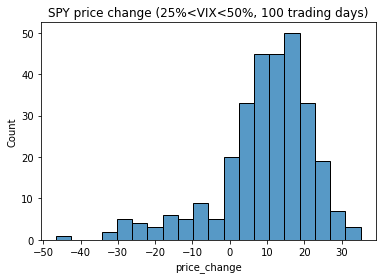

In [254]:
sns.histplot( price_change_df_6['price_change']).set_title('SPY price change (25%<VIX<50%, 100 trading days)')

In [255]:
price_change_df_7 = backtesting_SPY_price_change_on_VIX(round(vix_tbl[5],2),round(vix_tbl[6],2),100)
price_change_df_7.head()

,shifted_index,shifted_timestamp,shifted_close_SPY,shifted_close_VIX,filtered_index,filtered_timestamp,close_SPY,close_VIX,price_change
0,102,2016-04-28,207.42,15.22,2,2015-12-03,205.58,18.11,1.84
1,105,2016-05-03,206.13,15.60,5,2015-12-08,206.99,17.60,-0.86
2,106,2016-05-04,204.96,16.05,6,2015-12-09,205.33,19.61,-0.37
3,107,2016-05-05,204.95,15.91,7,2015-12-10,205.86,19.34,-0.91
4,110,2016-05-10,208.46,13.63,10,2015-12-15,205.06,20.95,3.40


Text(0.5, 1.0, 'SPY price change (50%<VIX<75%, 100 trading days)')

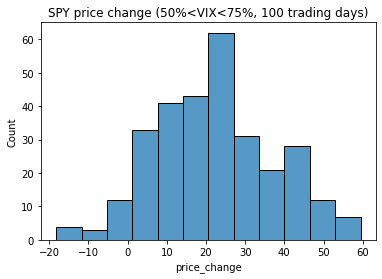

In [256]:
sns.histplot( price_change_df_7['price_change']).set_title('SPY price change (50%<VIX<75%, 100 trading days)')

In [257]:
price_change_df_8 = backtesting_SPY_price_change_on_VIX(round(vix_tbl[6],2),round(vix_tbl[7],2),100)
price_change_df_8.head()

,shifted_index,shifted_timestamp,shifted_close_SPY,shifted_close_VIX,filtered_index,filtered_timestamp,close_SPY,close_VIX,price_change
0,108,2016-05-06,205.70,14.72,8,2015-12-11,201.88,24.39,3.82
1,109,2016-05-09,205.89,14.57,9,2015-12-14,203.00,22.73,2.89
2,125,2016-06-01,210.30,14.20,25,2016-01-07,193.99,24.99,16.31
3,126,2016-06-02,210.92,13.63,26,2016-01-08,191.95,27.01,18.97
4,127,2016-06-03,210.28,13.47,27,2016-01-11,192.11,24.30,18.17


Text(0.5, 1.0, 'SPY price change (75%<VIX<min, 100 trading days)')

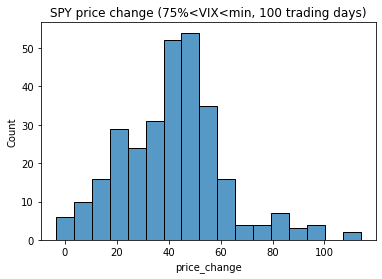

In [258]:
sns.histplot( price_change_df_8['price_change']).set_title('SPY price change (75%<VIX<min, 100 trading days)')

##### SPY close price changes at 252 tradings days when VIX close price at different shresholds

In [259]:
price_change_df_9 = backtesting_SPY_price_change_on_VIX(round(vix_tbl[3],2),round(vix_tbl[4],2),252)
price_change_df_9.head()

,shifted_index,shifted_timestamp,shifted_close_SPY,shifted_close_VIX,filtered_index,filtered_timestamp,close_SPY,close_VIX,price_change
0,407,2017-07-14,245.56,9.51,155,2016-07-14,216.11,12.82,29.45
1,408,2017-07-17,245.53,9.82,156,2016-07-15,215.84,12.67,29.69
2,409,2017-07-18,245.66,9.89,157,2016-07-18,216.41,12.44,29.25
3,410,2017-07-19,246.99,9.79,158,2016-07-19,216.18,11.97,30.81
4,411,2017-07-20,247.10,9.58,159,2016-07-20,217.13,11.77,29.97


Text(0.5, 1.0, 'SPY price change (min<VIX<25%, 252 trading days)')

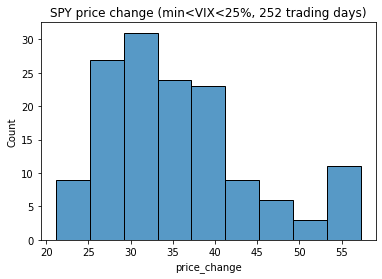

In [260]:
sns.histplot( price_change_df_9['price_change']).set_title('SPY price change (min<VIX<25%, 252 trading days)')

In [261]:
price_change_df_10 = backtesting_SPY_price_change_on_VIX(round(vix_tbl[4],2),round(vix_tbl[5],2),252)
price_change_df_10.head()

,shifted_index,shifted_timestamp,shifted_close_SPY,shifted_close_VIX,filtered_index,filtered_timestamp,close_SPY,close_VIX,price_change
0,252,2016-11-30,220.38,13.33,0,2015-12-01,210.68,14.67,9.70
1,253,2016-12-01,219.57,14.07,1,2015-12-02,208.54,15.91,11.03
2,255,2016-12-05,221.00,12.14,3,2015-12-04,209.66,14.81,11.34
3,256,2016-12-06,221.70,11.79,4,2015-12-07,208.27,15.84,13.43
4,268,2016-12-22,225.38,11.43,16,2015-12-23,206.05,15.57,19.33


Text(0.5, 1.0, 'SPY price change (25%<VIX<50%, 252 trading days)')

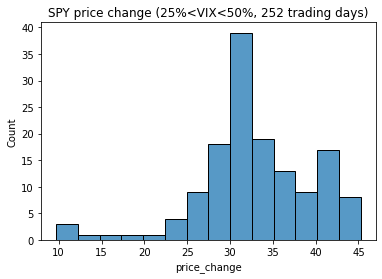

In [262]:
sns.histplot( price_change_df_10['price_change']).set_title('SPY price change (25%<VIX<50%, 252 trading days)')

In [263]:
price_change_df_11 = backtesting_SPY_price_change_on_VIX(round(vix_tbl[5],2),round(vix_tbl[6],2),252)
price_change_df_11.head()

,shifted_index,shifted_timestamp,shifted_close_SPY,shifted_close_VIX,filtered_index,filtered_timestamp,close_SPY,close_VIX,price_change
0,254,2016-12-02,219.68,14.12,2,2015-12-03,205.58,18.11,14.10
1,257,2016-12-07,224.60,12.22,5,2015-12-08,206.99,17.60,17.61
2,258,2016-12-08,225.15,12.64,6,2015-12-09,205.33,19.61,19.82
3,259,2016-12-09,226.51,11.75,7,2015-12-10,205.86,19.34,20.65
4,262,2016-12-14,225.88,13.19,10,2015-12-15,205.06,20.95,20.82


Text(0.5, 1.0, 'SPY price change (50%<VIX<75%, 252 trading days)')

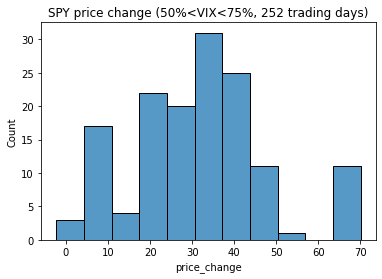

In [264]:
sns.histplot( price_change_df_11['price_change']).set_title('SPY price change (50%<VIX<75%, 252 trading days)')

In [265]:
price_change_df_12 = backtesting_SPY_price_change_on_VIX(round(vix_tbl[6],2),round(vix_tbl[7],2),252)
price_change_df_12.head()

,shifted_index,shifted_timestamp,shifted_close_SPY,shifted_close_VIX,filtered_index,filtered_timestamp,close_SPY,close_VIX,price_change
0,260,2016-12-12,226.25,12.64,8,2015-12-11,201.88,24.39,24.37
1,261,2016-12-13,227.76,12.72,9,2015-12-14,203.00,22.73,24.76
2,277,2017-01-06,227.21,11.32,25,2016-01-07,193.99,24.99,33.22
3,278,2017-01-09,226.46,11.56,26,2016-01-08,191.95,27.01,34.51
4,279,2017-01-10,226.46,11.49,27,2016-01-11,192.11,24.30,34.35


Text(0.5, 1.0, 'SPY price change (75%<VIX<max, 252 trading days)')

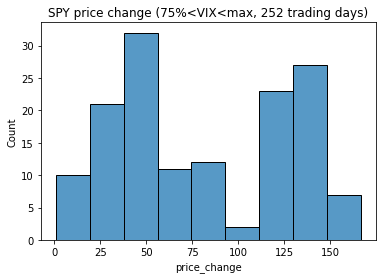

In [266]:
sns.histplot( price_change_df_12['price_change']).set_title('SPY price change (75%<VIX<max, 252 trading days)')

##### SPY close price changes at 350 tradings days when VIX close price at different shresholds

In [267]:
price_change_df_13 = backtesting_SPY_price_change_on_VIX(round(vix_tbl[3],2),round(vix_tbl[4],2),350)
price_change_df_13.head()

,shifted_index,shifted_timestamp,shifted_close_SPY,shifted_close_VIX,filtered_index,filtered_timestamp,close_SPY,close_VIX,price_change
0,505,2017-12-01,264.46,11.43,155,2016-07-14,216.11,12.82,48.35
1,506,2017-12-04,264.14,11.68,156,2016-07-15,215.84,12.67,48.30
2,507,2017-12-05,263.19,11.33,157,2016-07-18,216.41,12.44,46.78
3,508,2017-12-06,263.24,11.02,158,2016-07-19,216.18,11.97,47.06
4,509,2017-12-07,264.07,10.16,159,2016-07-20,217.13,11.77,46.94


Text(0.5, 1.0, 'SPY price change (min<VIX<25%, 350 trading days)')

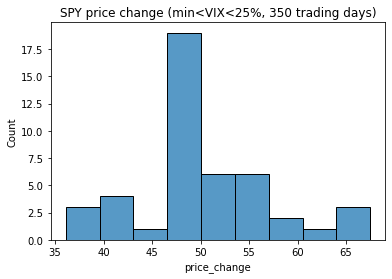

In [268]:
sns.histplot( price_change_df_13['price_change']).set_title('SPY price change (min<VIX<25%, 350 trading days)')

In [269]:
price_change_df_14 = backtesting_SPY_price_change_on_VIX(round(vix_tbl[4],2),round(vix_tbl[5],2),350)
price_change_df_14.head()

,shifted_index,shifted_timestamp,shifted_close_SPY,shifted_close_VIX,filtered_index,filtered_timestamp,close_SPY,close_VIX,price_change
0,350,2017-04-24,237.17,10.84,0,2015-12-01,210.68,14.67,26.49
1,351,2017-04-25,238.55,10.76,1,2015-12-02,208.54,15.91,30.01
2,353,2017-04-27,238.60,10.36,3,2015-12-04,209.66,14.81,28.94
3,354,2017-04-28,238.08,10.82,4,2015-12-07,208.27,15.84,29.81
4,366,2017-05-16,240.08,10.65,16,2015-12-23,206.05,15.57,34.03


Text(0.5, 1.0, 'SPY price change (25%<VIX<50%, 350 trading days)')

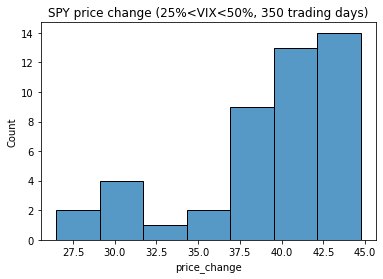

In [270]:
sns.histplot( price_change_df_14['price_change']).set_title('SPY price change (25%<VIX<50%, 350 trading days)')

In [271]:
price_change_df_15 = backtesting_SPY_price_change_on_VIX(round(vix_tbl[5],2),round(vix_tbl[6],2),350)
price_change_df_15.head()

,shifted_index,shifted_timestamp,shifted_close_SPY,shifted_close_VIX,filtered_index,filtered_timestamp,close_SPY,close_VIX,price_change
0,352,2017-04-26,238.40,10.85,2,2015-12-03,205.58,18.11,32.82
1,355,2017-05-01,238.68,10.11,5,2015-12-08,206.99,17.60,31.69
2,356,2017-05-02,238.77,10.59,6,2015-12-09,205.33,19.61,33.44
3,357,2017-05-03,238.48,10.68,7,2015-12-10,205.86,19.34,32.62
4,360,2017-05-08,239.66,9.77,10,2015-12-15,205.06,20.95,34.60


Text(0.5, 1.0, 'SPY price change (50%<VIX<75%, 350 trading days)')

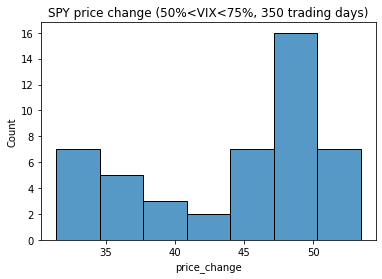

In [272]:
sns.histplot( price_change_df_15['price_change']).set_title('SPY price change (50%<VIX<75%, 350 trading days)')

In [273]:
price_change_df_16 = backtesting_SPY_price_change_on_VIX(round(vix_tbl[6],2),round(vix_tbl[7],2),350)
price_change_df_16.head()

,shifted_index,shifted_timestamp,shifted_close_SPY,shifted_close_VIX,filtered_index,filtered_timestamp,close_SPY,close_VIX,price_change
0,358,2017-05-04,238.76,10.46,8,2015-12-11,201.88,24.39,36.88
1,359,2017-05-05,239.70,10.57,9,2015-12-14,203.00,22.73,36.70
2,375,2017-05-30,241.50,10.38,25,2016-01-07,193.99,24.99,47.51
3,376,2017-05-31,241.44,10.41,26,2016-01-08,191.95,27.01,49.49
4,377,2017-06-01,243.36,9.89,27,2016-01-11,192.11,24.30,51.25


Text(0.5, 1.0, 'SPY price change (75%<VIX<max, 350 trading days)')

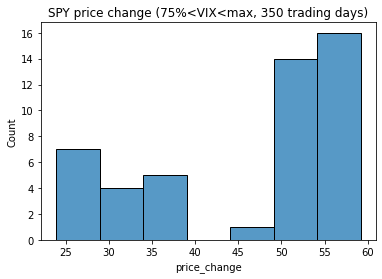

In [274]:
sns.histplot( price_change_df_16['price_change']).set_title('SPY price change (75%<VIX<max, 350 trading days)')